# SMS Spam Classifier

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# importing dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/spam.csv" , encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


##1 -  Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 columns as they contains lots of null values
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.sample(5)

,v1,v2
2648,ham,"Hi, can i please get a &lt;#&gt; dollar loan..."
4652,ham,Lol yes. But it will add some spice to your day.
5529,ham,What about this one then.
3019,ham,I thank you so much for all you do with selfle...
4481,ham,What do u reckon as need 2 arrange transport i...


In [ ]:
#reanaming columns
df = df.rename(columns={'v1': 'target' ,'v2': 'text'})
df.sample(5)

,target,text
1934,ham,Hope you are having a great day.
3604,ham,Jordan got voted out last nite!
4704,ham,Hey anyway i have to :-)
2906,ham,ALRITE
5064,ham,But your brother transfered only &lt;#&gt; +...


In [ ]:
# importing Label encoder to make output feature as categorical data

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking missing values
df.isnull().sum() #no missing values

target    0
text      0
dtype: int64

In [ ]:
# checking duplicate values
df.duplicated().sum()

403

In [ ]:
# printing duplicate values
duplicates = df.duplicated()
print(df[duplicates])

      target                                               text
102        0  As per your request 'Melle Melle (Oru Minnamin...
153        0  As per your request 'Melle Melle (Oru Minnamin...
206        0  As I entered my cabin my PA said, '' Happy B'd...
222        0                             Sorry, I'll call later
325        0                   No calls..messages..missed calls
...      ...                                                ...
5524       1  You are awarded a SiPix Digital Camera! call 0...
5535       0  I know you are thinkin malaria. But relax, chi...
5539       0                         Just sleeping..and surfing
5553       0                        Hahaha..use your brain dear
5558       0                             Sorry, I'll call later

[403 rows x 2 columns]


In [ ]:
# remove duplicate
df = df.drop_duplicates(keep = 'first')

df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

##2 -  EDA

In [ ]:
# counting unique values in target column
df.head()
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

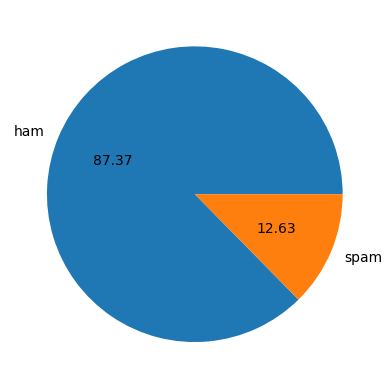

In [ ]:
# Comparing both ham and spam emails using pi-chart

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'] , autopct = '%0.2f')
plt.show()

In [ ]:
# After comparison we found out that the data is imbalanced

In [ ]:
import nltk # It is un NLP library
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# adding number of characters column
df['total_characters'] = df['text'].apply(len)
df.head()

,target,text,total_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# adding number of words column
df['total_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,total_characters,total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# adding number of sentences
df['total_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# for analysing ham emails
df[df['target'] == 0 ][['total_characters', 'total_words', 'total_sentences']].describe()

,total_characters,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# for analysing spam emails
df[df['target'] == 1 ][['total_characters', 'total_words', 'total_sentences']].describe()

,total_characters,total_words,total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='total_characters', ylabel='Count'>

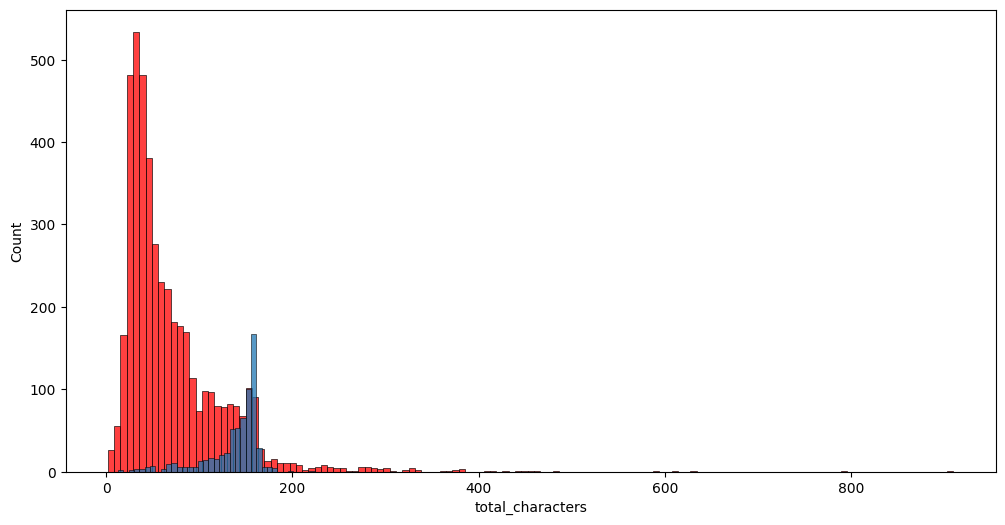

In [ ]:
# Comparing ham and spam emails characters count
import seaborn as sns
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['total_characters'] , color = 'red')
sns.histplot(df[df['target'] == 1]['total_characters'] )

<Axes: xlabel='total_words', ylabel='Count'>

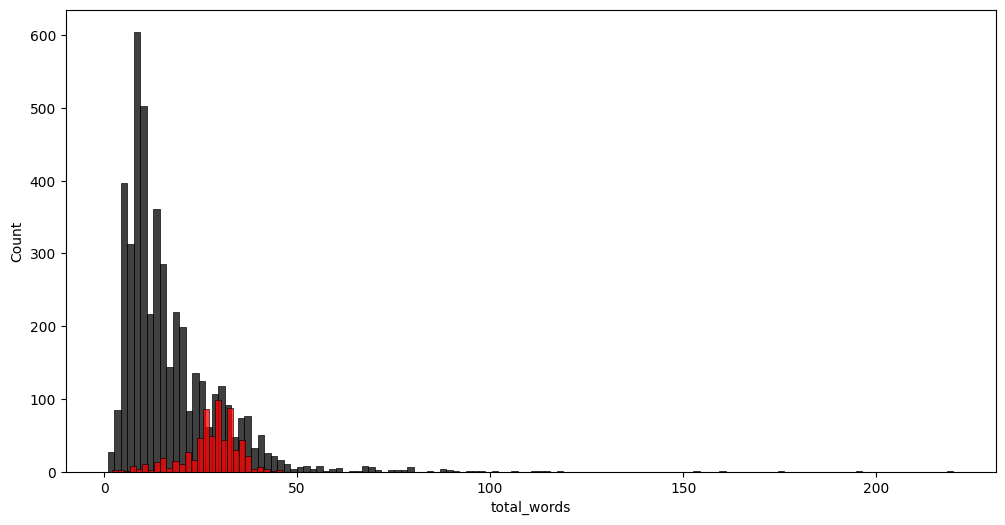

In [ ]:
# Comparing ham and spam emails words count
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['total_words'] , color = 'black')
sns.histplot(df[df['target'] == 1]['total_words'] , color = 'red')

<Axes: xlabel='total_sentences', ylabel='Count'>

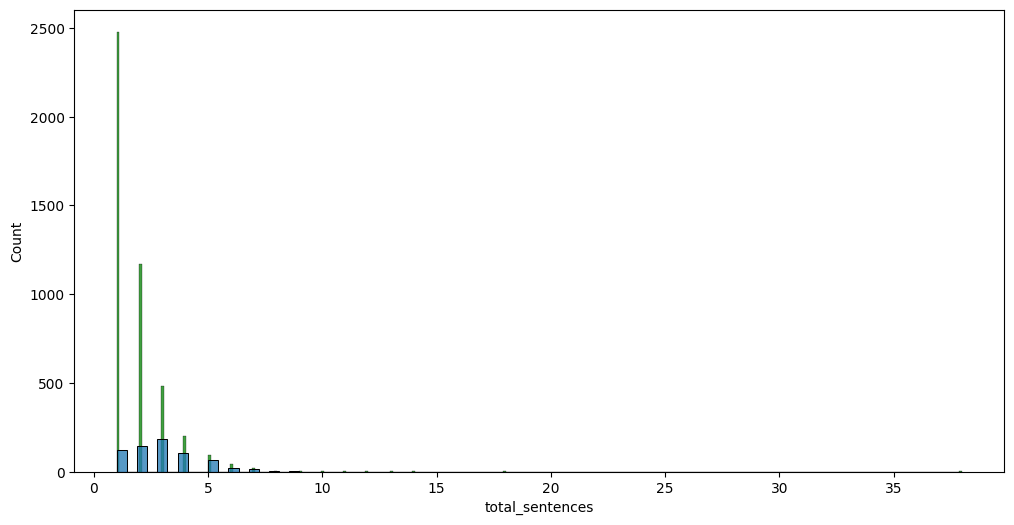

In [ ]:
# Comparing ham and spam emails sentences count
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['total_sentences'] , color='green')
sns.histplot(df[df['target'] == 1]['total_sentences'] )

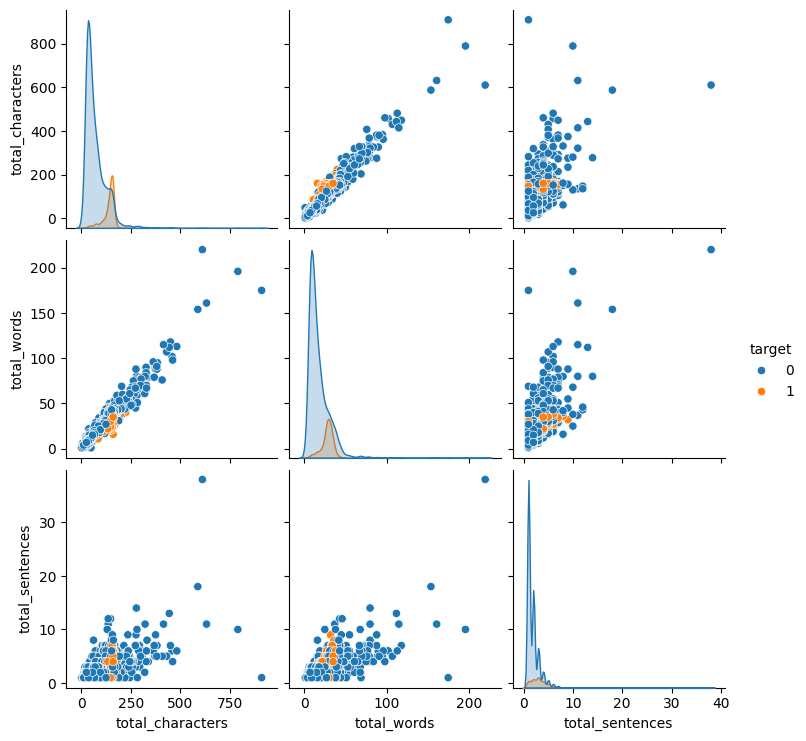

In [ ]:
# for more detailed analysis
sns.pairplot(df, hue='target')

<Axes: >

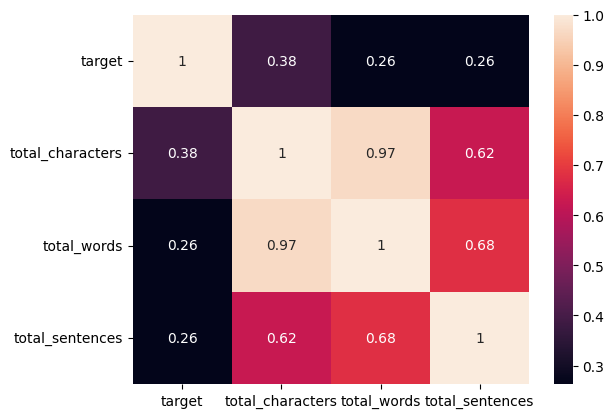

In [ ]:
# correlation only works on numeric columns
# here we are checking the crrelation of features with target

# sns.heatmap(df.corr(), annot = True)
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot= True)

## 3 - Data Preprocessing
*   Lower case
*   Tokenization
*   Removing special characters
*  Removing stop words and punctuation
*  Stemming


In [ ]:
# for importing and downloding stopwords

!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## importing sring for string oprations

import string

## it tells all the punctuations
#string.punctuation

In [ ]:
# importing PorterStemmer

# it removes stemming( words + ing , + ed , + s etc) words
## ex - running becoms run

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# ps.stem('loving') ##Test

In [ ]:
# text preprocessing steps
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(ps.stem(i))


  return " ".join(y)

In [ ]:
## This is just to test
transform_text("Hi My Name Is Dheeraj !! and I like coding. ")

'hi name dheeraj like code'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,total_characters,total_words,total_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(min_font_size=10,background_color='white')

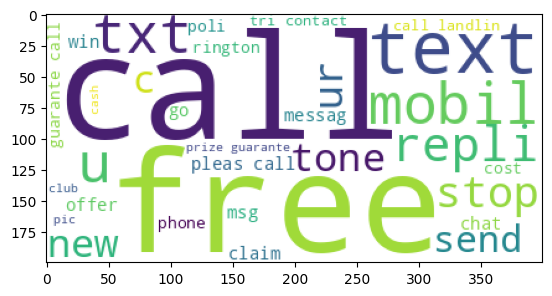

In [ ]:
# For spam emails to check most frequent words
spam_wd = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=''))
# plt.figure(figsize=(6,6))
plt.imshow(spam_wd)

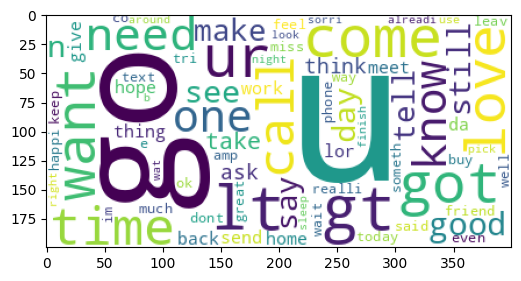

In [ ]:
# For ham emails to check most frequent words
spam_wd = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=''))
plt.figure(figsize=(6,6))
plt.imshow(spam_wd)

In [ ]:
# Counting frequent words for spam

spam_corpus =[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

# print(spam_corpus)
len(spam_corpus)

9939

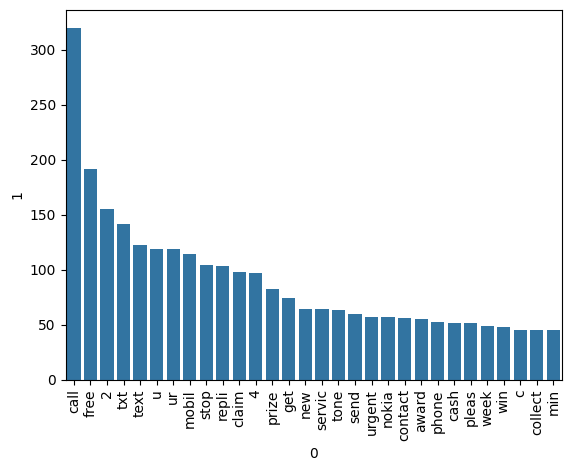

In [ ]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Counting frequent words for ham

ham_corpus =[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

35404

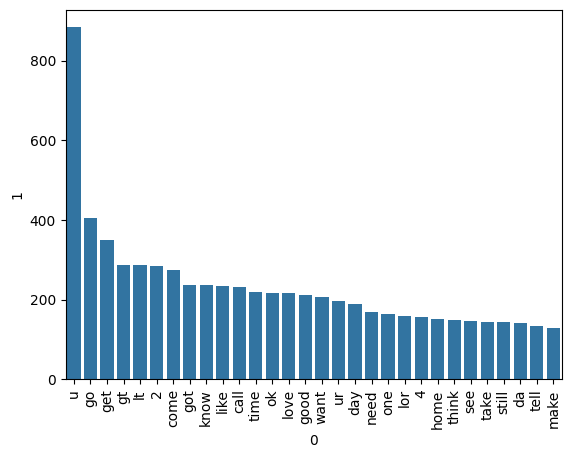

In [ ]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4 - Model Building

In [ ]:
# CountVectorizer is a useful tool in scikit-learn for converting a collection of text documents into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# print(y_pred1)
# print(y_test)

In [ ]:
# Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
# Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2)) # we selected tfidf with multinomialNB

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
# Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
